<a href="https://colab.research.google.com/github/ANKURKHATRI1-PRO/Disaster-tweet-project7/blob/main/NLPproject_disaster_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving twitter_disaster (1) - twitter_disaster (1).csv to twitter_disaster (1) - twitter_disaster (1).csv


#  Load and Explore the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter_disaster (1) - twitter_disaster (1).csv')

# Show basic info and the first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5079 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


#  Visualize Class Distribution

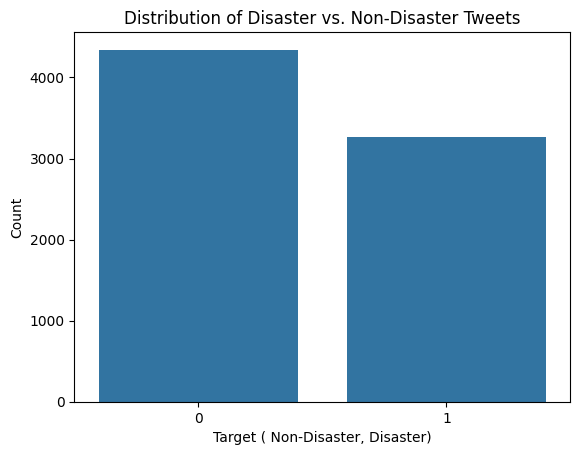

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of disaster vs. non-disaster tweets
sns.countplot(x='target', data=df)
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.xlabel("Target ( Non-Disaster, Disaster)")
plt.ylabel("Count")
plt.show()


#  Keyword Frequency Analysis

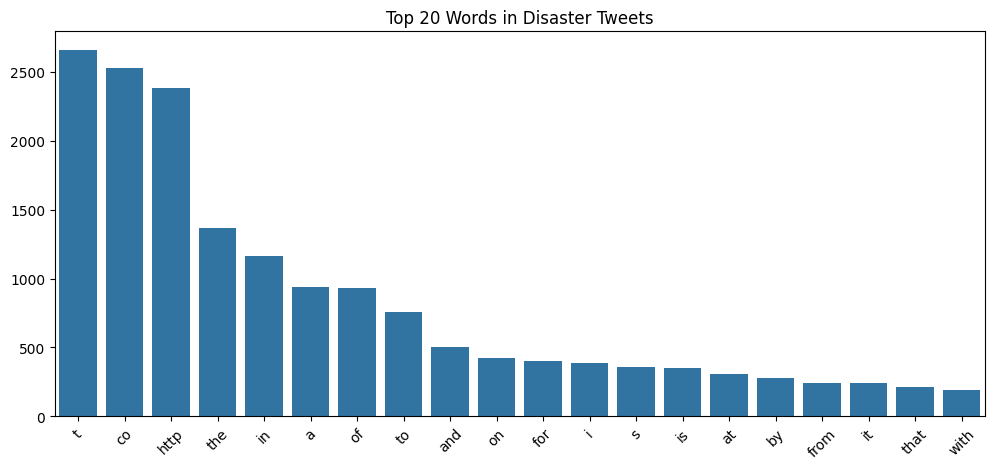

In [4]:
from collections import Counter
import re

# Combine all disaster tweets into one big text
disaster_tweets = df[df['target'] == 1]['text'].str.lower().str.cat(sep=' ')
words = re.findall(r'\b\w+\b', disaster_tweets)
common_words = Counter(words).most_common(20)

# Visualize top words
top_words, counts = zip(*common_words)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(top_words), y=list(counts))
plt.title("Top 20 Words in Disaster Tweets")
plt.xticks(rotation=45)
plt.show()


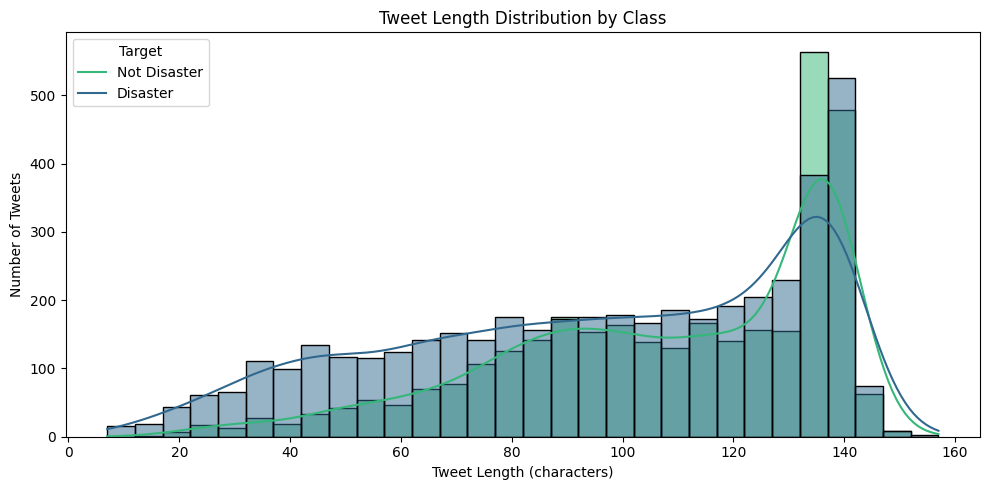

In [5]:
# Add tweet length column
df['text_length'] = df['text'].apply(lambda x: len(x))

# Plot tweet length distributions for both classes
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='target', bins=30, kde=True, palette='viridis')
plt.title("Tweet Length Distribution by Class")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Number of Tweets")
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.tight_layout()
plt.show()

#  Data Cleaning and Preprocessing

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# show clean data
df.head()

,id,keyword,location,text,target,text_length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,87,just got sent this photo from ruby alaska as s...


In [9]:
# Get top keywords for each class
top_keywords_disaster = df[df['target'] == 1]['keyword'].value_counts().head(10)
top_keywords_non_disaster = df[df['target'] == 0]['keyword'].value_counts().head(10)

# Display results
print("Top Keywords in Disaster Tweets:\n", top_keywords_disaster)
print("\nTop Keywords in Non-Disaster Tweets:\n", top_keywords_non_disaster)

Top Keywords in Disaster Tweets:
 keyword
derailment           39
outbreak             39
wreckage             39
debris               37
oil%20spill          37
typhoon              37
rescuers             32
suicide%20bomb       32
suicide%20bombing    32
evacuated            32
Name: count, dtype: int64

Top Keywords in Non-Disaster Tweets:
 keyword
body%20bags    40
armageddon     37
harm           37
deluge         36
ruin           36
wrecked        36
explode        35
fear           35
twister        35
siren          35
Name: count, dtype: int64


<ipython-input-10-8cb0f776b88d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_disaster.index, x=top_disaster.values, ax=axes[0], palette='Reds_r')
<ipython-input-10-8cb0f776b88d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_non_disaster.index, x=top_non_disaster.values, ax=axes[1], palette='Blues_r')


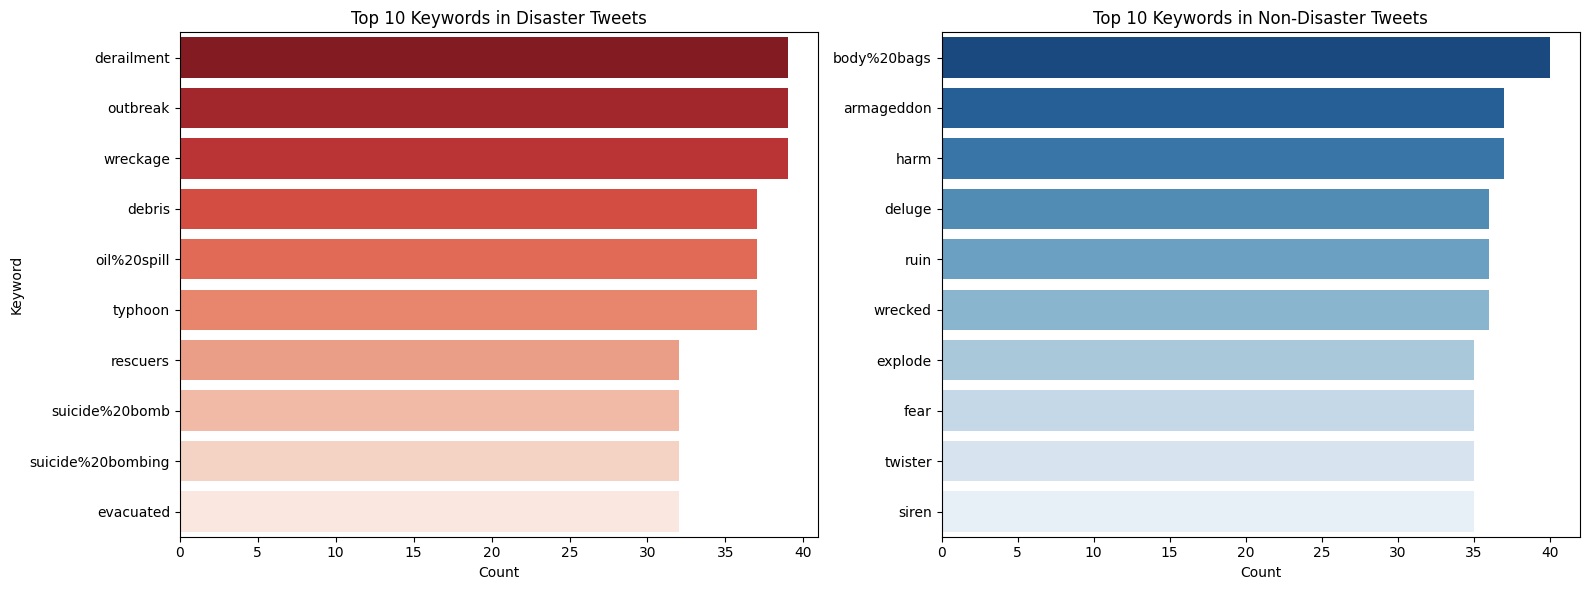

In [10]:
# Create a side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Assign top_keywords_disaster to top_disaster for plotting
top_disaster = top_keywords_disaster
top_non_disaster = top_keywords_non_disaster

sns.barplot(y=top_disaster.index, x=top_disaster.values, ax=axes[0], palette='Reds_r')
axes[0].set_title("Top 10 Keywords in Disaster Tweets")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Keyword")

sns.barplot(y=top_non_disaster.index, x=top_non_disaster.values, ax=axes[1], palette='Blues_r')
axes[1].set_title("Top 10 Keywords in Non-Disaster Tweets")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

# Encode Labels and Split Dataset

In [16]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  TF-IDF Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english') # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can print the shapes:
print(f"TF-IDF Matrix Shape (Train): {X_train_tfidf.shape}")
print(f"TF-IDF Matrix Shape (Test): {X_test_tfidf.shape}")

TF-IDF Matrix Shape (Train): (6090, 5000)
TF-IDF Matrix Shape (Test): (1523, 5000)


# Sentiment Features with textblob

In [18]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply to data
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Split again
X_sentiment = df['sentiment']
X_train_sent = X_sentiment[y.index.isin(y_train.index)]
X_test_sent = X_sentiment[y.index.isin(y_test.index)]


#Additional Features
- add features like tweet length, number of hashtags, mentions, etc.

In [19]:
df['tweet_len'] = df['clean_text'].apply(len)
df['num_hashtags'] = df['text'].str.count('#')
df['num_mentions'] = df['text'].str.count('@')


# Prepare These Features for Modeling
Now, let’s align these features with your X_train and X_test splits

In [20]:
# Extract features
extra_features = ['tweet_len', 'num_hashtags', 'num_mentions']

# Create feature matrices
X_extra = df[extra_features]

# Align with the original train-test split
X_train_extra = X_extra.loc[X_train.index]
X_test_extra = X_extra.loc[X_test.index]


#  Combine TF-IDF and Extra Features
To use both TF-IDF and extra features in your model, we can horizontally stack them

In [21]:
from scipy.sparse import hstack

# Convert extra features to sparse format to match TF-IDF
from scipy import sparse

X_train_combined = hstack([X_train_tfidf, sparse.csr_matrix(X_train_extra.values)])
X_test_combined = hstack([X_test_tfidf, sparse.csr_matrix(X_test_extra.values)])


In [22]:
X_train_combined
X_test_combined


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12086 stored elements and shape (1523, 5003)>

# Model Selection and Training
MultinomialNB works best with TF-IDF only (not good with negative or real-valued inputs like extra features), so we’ll only apply it to TF-IDF.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}


#  Cross-Validation to Evaluate Models

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(name, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{name} F1 Score: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Evaluate models
for name, model in models.items():
    print(f"Evaluating: {name}")
    if name == "Naive Bayes":
        evaluate_model(name, model, X_train_tfidf, y_train)
    else:
        evaluate_model(name, model, X_train_combined, y_train)


Evaluating: Logistic Regression
Logistic Regression F1 Score: 0.7243 (+/- 0.0157)
Evaluating: Random Forest
Random Forest F1 Score: 0.6941 (+/- 0.0174)
Evaluating: Linear SVM


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM F1 Score: 0.4820 (+/- 0.1724)
Evaluating: Naive Bayes
Naive Bayes F1 Score: 0.7298 (+/- 0.0086)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Train Best-Performing Model on Full Train Set
Let’s assume Logistic Regression performs best (often does in NLP).

In [25]:
# Train final model
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_combined, y_train)


LogisticRegression(max_iter=1000)

#  Evaluate on the Test Set

 Import and Define Hyperparameter Grid
We’ll try different values for:

C: inverse of regularization strength (lower = stronger regularization)

penalty: regularization type (l2 is standard)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}


In [27]:
# Create grid search object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_combined, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.7242826020382973


 # Evaluate the Optimized Model on Test Set

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       869
           1       0.82      0.70      0.76       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



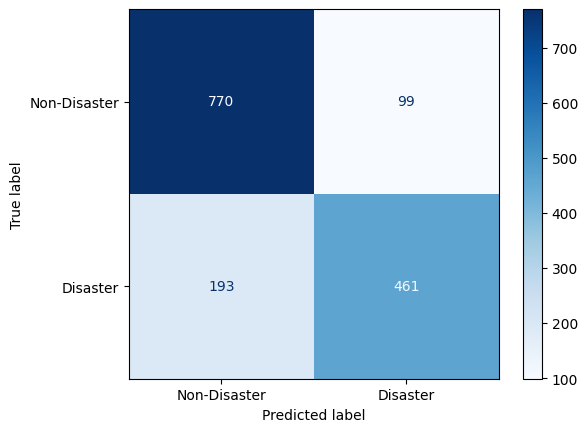

In [28]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on test set
y_pred_optimized = best_model.predict(X_test_combined)

# Final evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_optimized))

cm = confusion_matrix(y_test, y_pred_optimized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Disaster', 'Disaster'])
disp.plot(cmap='Blues')


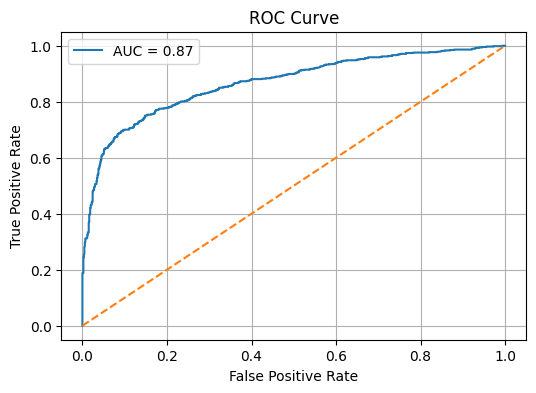

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = best_model.predict_proba(X_test_combined)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


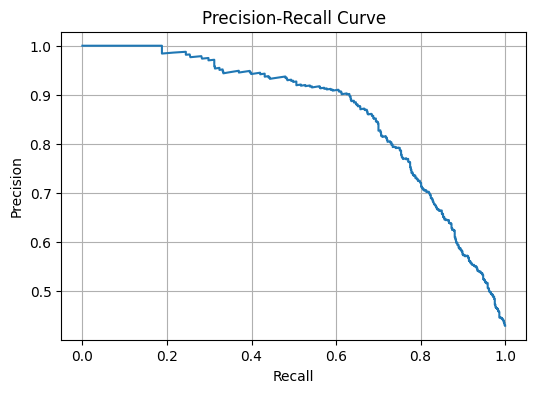

In [30]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


In [31]:
from sklearn.metrics import f1_score  # Import f1_score

train_pred = best_model.predict(X_train_combined)
train_f1 = f1_score(y_train, train_pred)

print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test  F1 Score: {f1_score(y_test, y_pred_optimized):.4f}")

Train F1 Score: 0.8393
Test  F1 Score: 0.7595


#  Serialize the Trained Model

In [32]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create a working folder inside your drive

In [33]:
import os

project_dir = "/content/drive/MyDrive/disaster_tweet_app"
os.makedirs(f"{project_dir}/templates", exist_ok=True)
os.makedirs(f"{project_dir}/static", exist_ok=True)


#  Save Your Files

In [34]:
app_code = '''
from flask import Flask, request, render_template
import pickle
import numpy as np
import re

model = pickle.load(open("disaster_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

app = Flask(__name__)

def preprocess_text(text):
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\\@\\w+', '', text)
    text = re.sub(r'\\#\\w+', '', text)
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    text = text.lower().strip()
    return text

def extract_features(text):
    clean = preprocess_text(text)
    tfidf = vectorizer.transform([clean])

    tweet_len = len(clean)
    num_words = len(clean.split())
    num_hashtags = text.count('#')
    num_mentions = text.count('@')
    num_exclamations = text.count('!')

    extra_feats = np.array([[tweet_len, num_words, num_hashtags, num_mentions, num_exclamations]])
    return np.hstack([tfidf.toarray(), extra_feats])

@app.route("/", methods=["GET", "POST"])
def index():
    result = None
    if request.method == "POST":
        tweet = request.form["tweet"]
        features = extract_features(tweet)
        pred = model.predict(features)[0]
        result = "🚨 Disaster Tweet" if pred == 1 else "✅ Not a Disaster Tweet"
    return render_template("index.html", result=result)

if __name__ == "__main__":
    app.run(debug=True)
'''

with open(f"{project_dir}/app.py", "w") as f:
    f.write(app_code)


In [35]:
html_code = '''
<!DOCTYPE html>
<html>
<head>
    <title>Disaster Tweet Classifier</title>
    <style>
        body { font-family: Arial; text-align: center; padding: 40px; background: #f0f2f5; }
        textarea { width: 400px; padding: 10px; margin-top: 10px; }
        .result { font-size: 1.2rem; margin-top: 20px; color: #333; }
    </style>
</head>
<body>
    <h2>Disaster Tweet Classifier</h2>
    <form method="POST">
        <textarea name="tweet" placeholder="Paste tweet here..." rows="4"></textarea><br>
        <input type="submit" value="Classify Tweet">
    </form>
    {% if result %}
        <div class="result"><strong>{{ result }}</strong></div>
    {% endif %}
</body>
</html>
'''

with open(f"{project_dir}/templates/index.html", "w") as f:
    f.write(html_code)


# Save Model and Vectorizer

In [37]:
import pickle

# Save model and vectorizer
with open("disaster_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f) # Changed 'tfidf' to 'tfidf_vectorizer'

#  Zip the Project Folder

In [38]:
import shutil

shutil.make_archive("/content/disaster_tweet_app", 'zip', project_dir)


'/content/disaster_tweet_app.zip'

# This will trigger a download pop-up in your browser and save the zipped Flask project to your computer

In [39]:
from google.colab import files
files.download("/content/disaster_tweet_app.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>